In [2]:
!pip install pandas



In [3]:
import pandas as pd


In [4]:
df = pd.read_csv("car data.csv")

In [5]:
df.sample(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
30,ritz,2012,3.1,5.98,51439,Diesel,Dealer,Manual,0
82,innova,2017,23.0,25.39,15000,Diesel,Dealer,Automatic,0
97,corolla altis,2017,17.0,18.64,8700,Petrol,Dealer,Manual,0


In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
#checking the shape of the data
df.shape

(301, 9)

In [8]:
#Checking all unique values from categorical data

print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [9]:
#check missing or null values

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
df["Current Year"] = 2022

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [13]:
df.drop(['Car_Name'],axis =1,inplace = True)

In [14]:
df['Car Year'] = df['Current Year']- df['Year']

In [15]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,Car Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [16]:
df.drop(['Year','Current Year'],axis =1,inplace = True)

In [17]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [18]:

df1 = pd.get_dummies(data=df, columns=['Fuel_Type','Seller_Type','Transmission'])


In [19]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car Year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,8,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,9,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,5,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,11,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,8,0,1,0,1,0,0,1


In [20]:
df1.shape

(301, 12)

In [21]:
df1.drop(['Transmission_Automatic','Seller_Type_Individual','Fuel_Type_Petrol'],axis = 1,inplace = True)

In [22]:
df1.shape

(301, 9)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df1.drop(['Selling_Price'],axis = 1)
y = df1.Selling_Price

In [27]:
X.sample(4)

,Present_Price,Kms_Driven,Owner,Car Year,Fuel_Type_CNG,Fuel_Type_Diesel,Seller_Type_Dealer,Transmission_Manual
76,14.68,72000,0,9,0,0,1,1
298,11.00,87934,0,13,0,0,1,1
291,6.10,31427,0,7,0,0,1,1
223,9.40,61381,0,7,0,1,1,1


In [ ]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train,y_train)

LinearRegression()

In [32]:
model.score(X_test,y_test)

0.8591605683718533

In [33]:
model.predict([[18.61,11000,0,14,0,0,0,1]])

C:\Users\SAMIR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.63110453])

In [34]:
import pickle

In [35]:
with open('carprice.pickle','wb') as f:
    pickle.dump(model,f)

In [36]:
predictions = model.predict(X_test)

In [37]:
predictions

array([10.1566356 ,  1.43067259,  4.97019175,  8.14336339, 10.11643446,
        4.29425984,  0.76349992,  5.67467785,  0.75602466,  1.88716952,
       21.23087906,  4.02467402,  2.17775403, -1.58734481,  4.05403883,
       -1.14158375,  5.20796487,  2.87962733,  7.62386355,  1.90911183,
        9.27107372,  8.04782458,  0.05696164,  5.18872967,  7.1093885 ,
        3.47935201,  2.46296694, -0.68006982,  7.69249571, -3.7830538 ,
        5.17771646,  3.56126279,  7.43447479, 16.37577379,  3.60596637,
        1.77843568,  4.33841739,  4.61943051,  6.26334713, -0.20407423,
        1.48801346,  0.20606734,  9.34685279,  4.64849135,  0.22789481,
        8.89721311,  4.39885253,  8.2131178 ,  3.57097672,  1.73820092,
        9.0931536 , -1.13029101,  4.79776785,  8.08584844,  0.22466758,
        2.62428959, -1.00585395,  4.31367294,  3.61013119, -0.87677427,
        7.42316668,  4.90796792, 10.42468414,  1.35738555,  5.31667549,
        7.02890524,  2.26794912,  7.99475541,  1.31562034,  4.08

In [38]:
!pip install matplotlib

In [39]:
!pip install seaborn

In [40]:
import seaborn as sns

C:\Users\SAMIR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

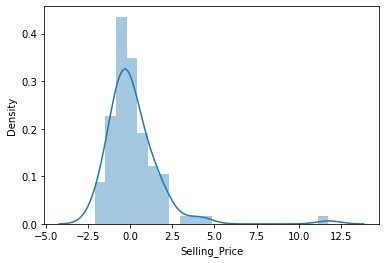

In [41]:
sns.distplot(y_test-predictions)

In [42]:
import matplotlib.pyplot as plt

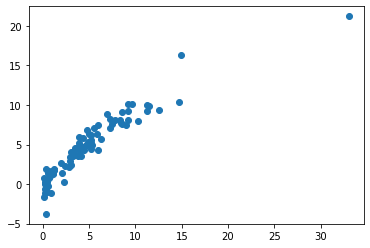

In [43]:
plt.scatter(y_test,predictions)